# Interactive influence lines #

Simply supported beam loaded by a nodal force

In [43]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

In [73]:
EI, x = sp.symbols('EI, x',real=True)

In [74]:
Av, Am, Bv, Cv = sp.symbols('Av, Am, Bv, Cv',real=True)
a, b, L1, L2 = sp.symbols('a, b, L1, L2',real=True,positive=True)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')

##  Finding influence line for M ##

In [75]:
q = - Bv * sp.SingularityFunction(x,L1,-1) - Av * sp.SingularityFunction(x,0,-1)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 - sp.SingularityFunction(x,a,0)
w = sp.integrate(phi,x)+C4

Piecewise((2 - 2*x/5, x > 2), (3*x/5, True))

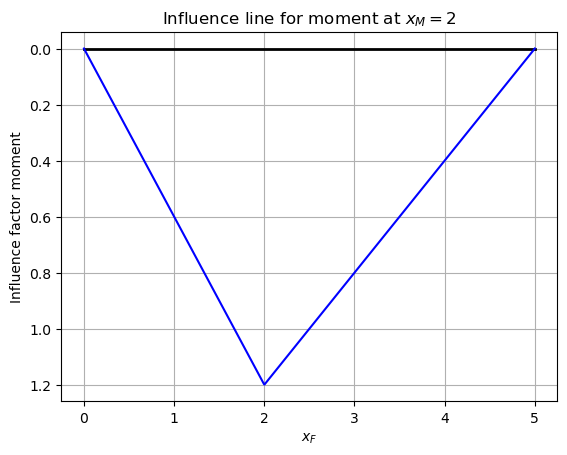

In [76]:
%matplotlib inline
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+1),0)
sol = sp.solve([eq1,eq2,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
M_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,5,1000)
plt.plot([0,5],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for moment at $x_M = 2$'
axs.set_title(title0);

## Find influence line M for all load and moment locations

In [77]:
function3d = w_sol.subs([(L1,5),(L2,5),(EI,5000)]).rewrite(sp.Piecewise).simplify()
display(function3d)

Piecewise((a*(5 - x)/5, (a < 5) & (a < x)), (a - x, a < x), (x*(5 - a)/5, a < 5), (0, True))

<IPython.core.display.Javascript object>


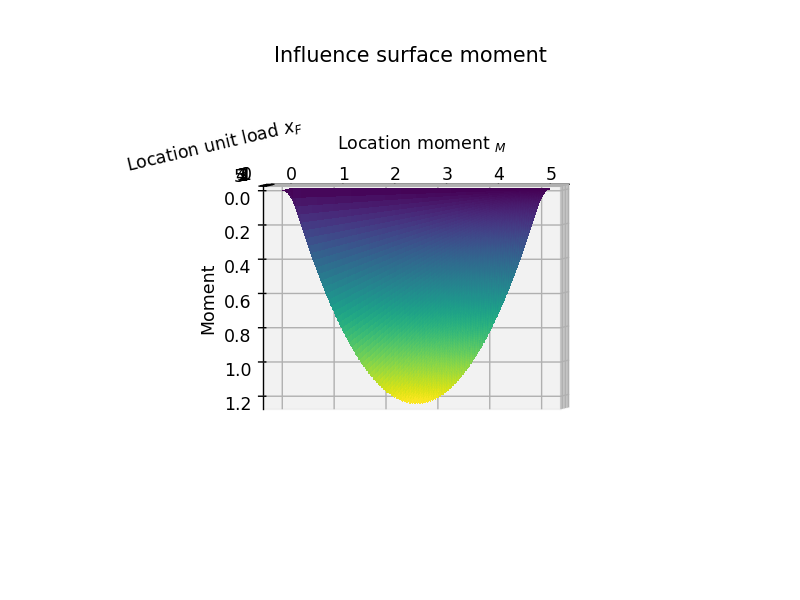

In [78]:
%matplotlib notebook

a_input = np.linspace(0,5,100) #location moment
x_input = np.linspace(0,5,100) #location unit load

A_input,X_input = np.meshgrid(a_input,x_input)
Z = M_inf_numpy(5,5,A_input,5000,X_input)

ax = plt.axes(projection='3d')
ax.plot_surface(A_input, X_input, Z, rstride=1, cstride=1,
                cmap='viridis',antialiased=False)
ax.set_title('Influence surface moment');
ax.set_xlabel('Location moment $_M$')
ax.set_ylabel('Location unit load $x_F$')
ax.set_zlabel('Moment');
ax.invert_zaxis()
#ax.view_init(elev=0, azim=-90)
ax.set_proj_type('ortho')

In [79]:
test = w_sol.subs([(L1,5),(L2,5),(EI,5000)]).rewrite(sp.Piecewise).simplify()
display(test)
sp.maximum(test,a,sp.Interval(0,2))

Piecewise((a*(5 - x)/5, (a < 5) & (a < x)), (a - x, a < x), (x*(5 - a)/5, a < 5), (0, True))

NotImplementedError: 
multivariate conditions are not handled.

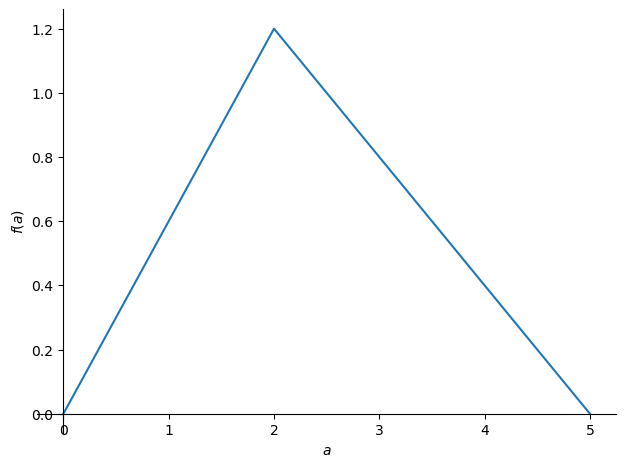

KeyboardInterrupt: 

In [40]:
%matplotlib inline
sp.plot(w_sol.subs([(L1,5),(L2,5),(EI,5000),(x,2)]),(a,0,5))
sp.maximum(w_sol.subs([(L1,5),(L2,5),(EI,5000),(x,2)]),a)

## Find influence line V ##

Piecewise((x/5 - 1, x > 2), (x/5, x > 0), (x*(Am*x + 2000)/10000, True))

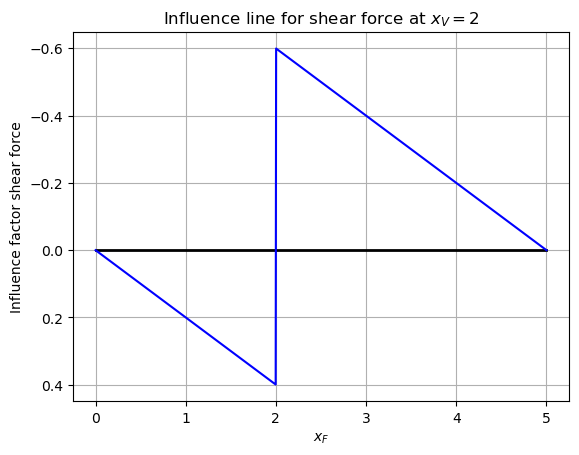

In [36]:
%matplotlib inline
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4 - sp.SingularityFunction(x,a,0)
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+1),0)
sol = sp.solve([eq1,eq2,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
V_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,5,1000)
plt.plot([0,5],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force at $x_V = 2$'
axs.set_title(title0);

## Find influence line V for all load and shear force locations ##

In [37]:
function3d = w_sol.subs([(L1,5),(L2,5),(EI,5000)]).rewrite(sp.Piecewise).simplify()
display(function3d)

Piecewise((x/5 - 1, (a < 5) & (a < x)), (-1, a < x), (x/5, (x > 0) & (a < 5)), (0, x > 0), (x*(Am*x + 2000)/10000, a < 5), (Am*x**2/10000, True))

<IPython.core.display.Javascript object>


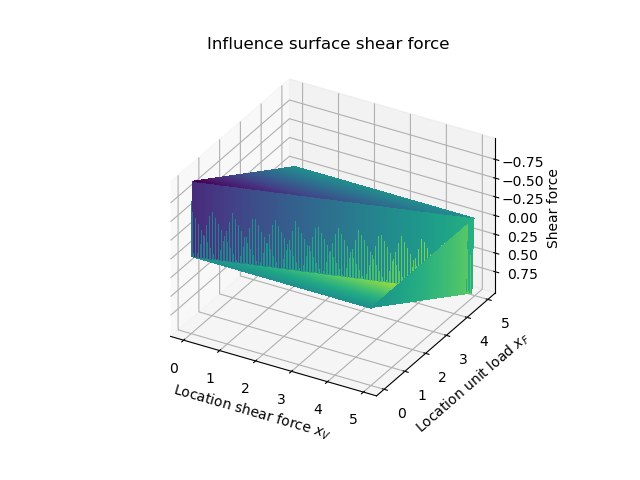

In [38]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt

a_input = np.linspace(0,5,100) #location shear force
x_input = np.linspace(0,5,100) #location unit load

A_input,X_input = np.meshgrid(a_input,x_input)
Z = V_inf_numpy(5,5,A_input,5000,X_input)

ax = plt.axes(projection='3d')
ax.plot_surface(A_input, X_input, Z, rstride=1, cstride=1,
                cmap='viridis',antialiased=False)
ax.set_title('Influence surface shear force');
ax.set_xlabel('Location shear force $x_V$')
ax.set_ylabel('Location unit load $x_F$')
ax.set_zlabel('Shear force');
ax.invert_zaxis()
#ax.view_init(elev=0, azim=-90)
ax.set_proj_type('ortho')